In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


diab_data = pd.read_csv("diabetic_data.csv", na_values = ["?",'missing', 'Unknown/Invalid', 'NaN'])

In [160]:
#check the number of rows and columns in the Data
print('Number of rows: ' + str(diab_data.shape[0]))
print('Number of columns: ' + str(diab_data.shape[1]))

Number of rows: 101766
Number of columns: 50


In [147]:
#All variables in data
diab_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [148]:
#First 5 rows

diab_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [161]:
#Exploratory Data Analysis

#Missing Values
#Identify variables/columns with missing values and the counts and % of missing values in this columns
#For now variables with over 50% missing values will be removed when building the models afterwards rows with missing values will be removed. 
#In Phase 2 of this project, imputation methods will be applied to variables which have less than 50% of its values missing to help improve the model
col_with_na = [col for col in diab_data.columns if diab_data[col].isnull().sum()>1]

print('Count of Missing Values: ')
for col in col_with_na:
    print(str(col), diab_data[col].isnull().sum(), ' missing values')
    
print()
    
print('Percentage of Missing Values: ')
for col in col_with_na:
    print(str(col), np.round(diab_data[col].isnull().mean(), 5)*100, '% of missing values')

Count of Missing Values: 
race 2273  missing values
gender 3  missing values
weight 98569  missing values
payer_code 40256  missing values
medical_specialty 49949  missing values
diag_1 21  missing values
diag_2 358  missing values
diag_3 1423  missing values

Percentage of Missing Values: 
race 2.234 % of missing values
gender 0.003 % of missing values
weight 96.858 % of missing values
payer_code 39.556999999999995 % of missing values
medical_specialty 49.082 % of missing values
diag_1 0.021 % of missing values
diag_2 0.35200000000000004 % of missing values
diag_3 1.398 % of missing values


In [162]:
#Numerical Variables

#Notice weight is not among the numerical variable
#This would have been converted to a numerical variable but since it has over 50% of its values missing it will be removed
#variables such as ids that are unique to each patient will be removed as they are not descriptive ids

#create a list of numerical variable names
numerical_col = [col for col in diab_data.columns if diab_data[col].dtypes != 'O']

#Numerical variables
print('Numerical variables')
print(numerical_col)
print()

#Number of numerical variables
print('Number of Numerical Variables: ' + str(len(numerical_col)))
print()

#Top 5 rows of numerical variables
diab_data[numerical_col].head()
print()

#Summary of numerical variables
print('Summary of numerical variables')
diab_data[numerical_col].describe()

Numerical variables
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Number of Numerical Variables: 13


Summary of numerical variables


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


encounter_id


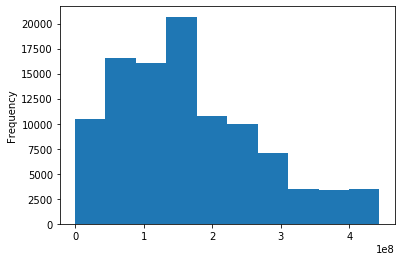

patient_nbr


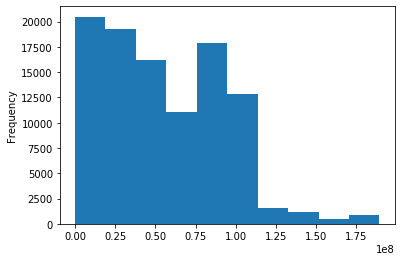

admission_type_id


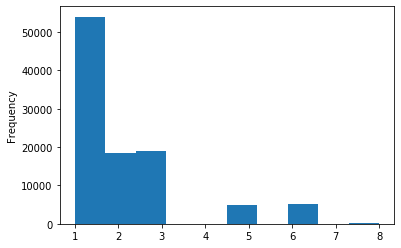

discharge_disposition_id


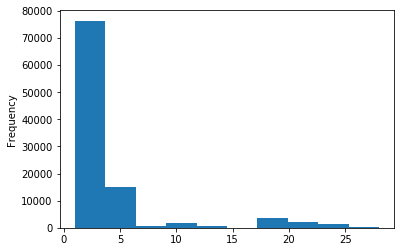

admission_source_id


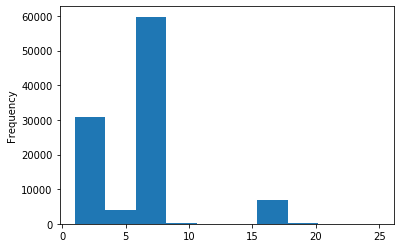

time_in_hospital


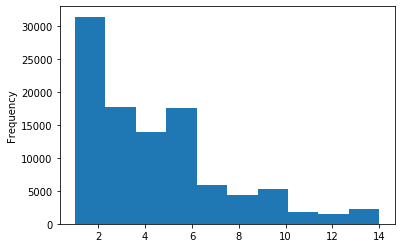

num_lab_procedures


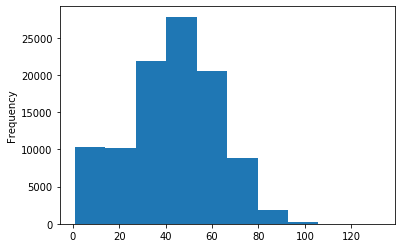

num_procedures


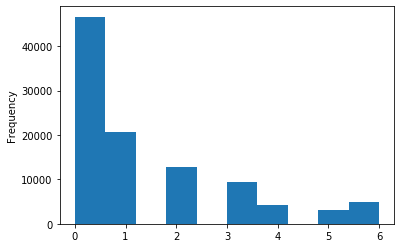

num_medications


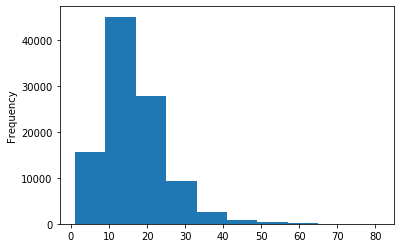

number_outpatient


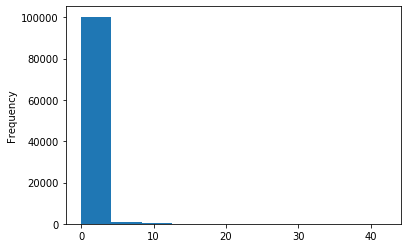

number_emergency


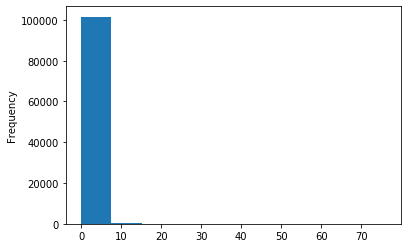

number_inpatient


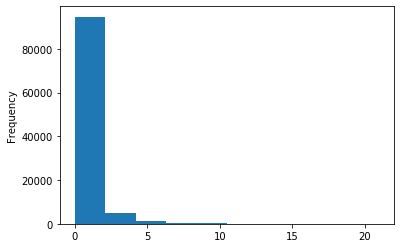

number_diagnoses


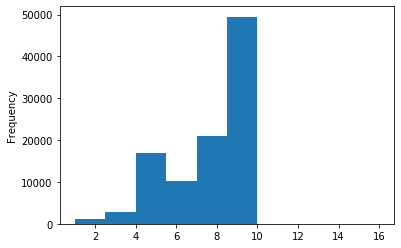

In [119]:
#Visualize for numerical variables using histograms
for i in numerical_col:
    print(i)
    diab_data[i].plot('hist')
    plt.show()

In [163]:
#categorical variables

#create a list of categorical variable names
categorical_col = [col for col in diab_data.columns if diab_data[col].dtypes == 'O']


#Identify the amount of unique values in each categorical variable
for col in categorical_col:
    print(col, len(diab_data[col].unique()), 'categories')

race 6 categories
gender 3 categories
age 10 categories
weight 10 categories
payer_code 18 categories
medical_specialty 73 categories
diag_1 717 categories
diag_2 749 categories
diag_3 790 categories
max_glu_serum 4 categories
A1Cresult 4 categories
metformin 4 categories
repaglinide 4 categories
nateglinide 4 categories
chlorpropamide 4 categories
glimepiride 4 categories
acetohexamide 2 categories
glipizide 4 categories
glyburide 4 categories
tolbutamide 2 categories
pioglitazone 4 categories
rosiglitazone 4 categories
acarbose 4 categories
miglitol 4 categories
troglitazone 2 categories
tolazamide 3 categories
examide 1 categories
citoglipton 1 categories
insulin 4 categories
glyburide-metformin 4 categories
glipizide-metformin 2 categories
glimepiride-pioglitazone 2 categories
metformin-rosiglitazone 2 categories
metformin-pioglitazone 2 categories
change 2 categories
diabetesMed 2 categories
readmitted 3 categories


In [152]:
#print Top five rows for categorical variables

diab_data[categorical_col].head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,NaN,NaN,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,NaN,NaN,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,NaN,NaN,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


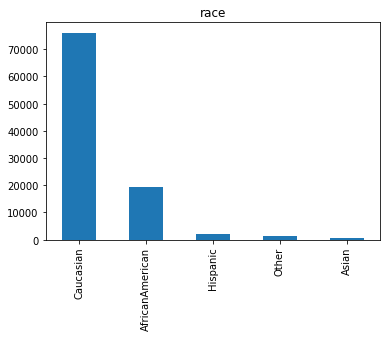

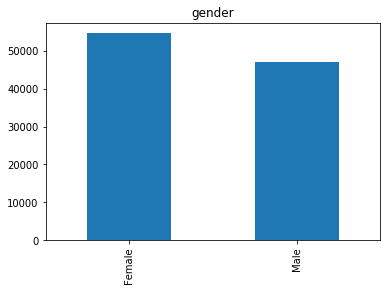

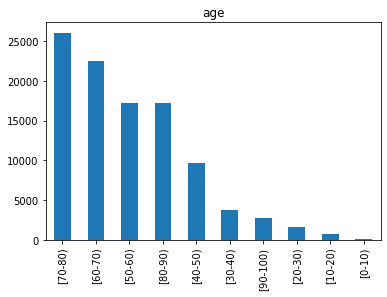

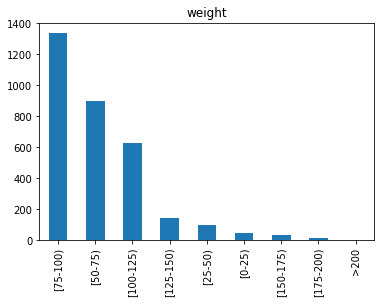

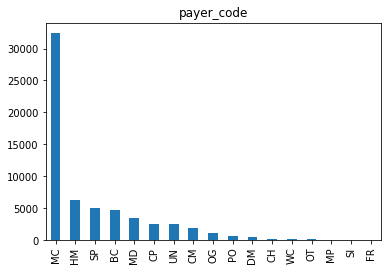

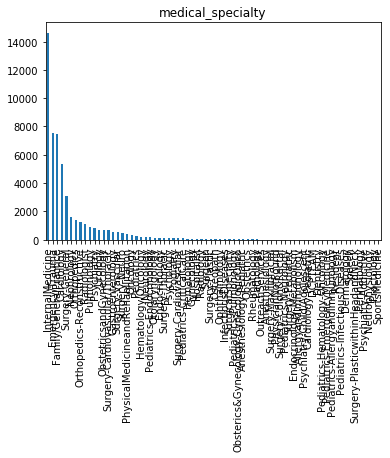

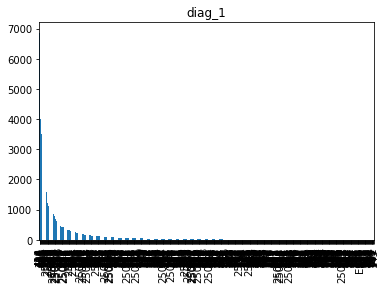

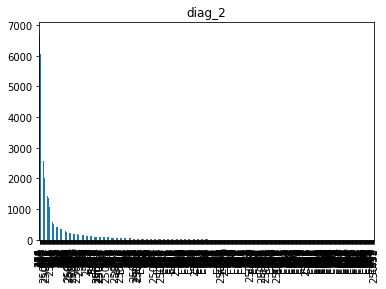

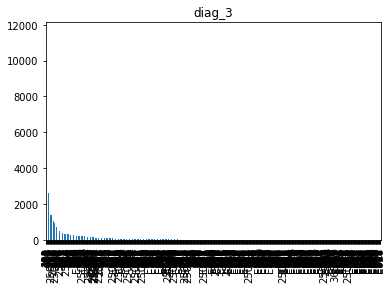

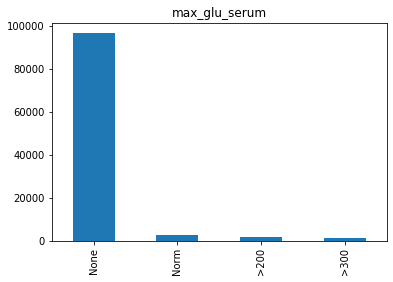

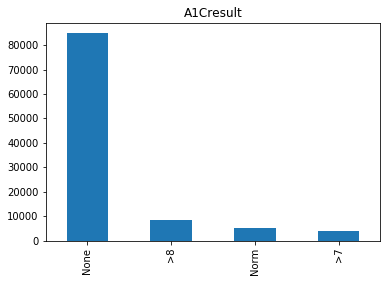

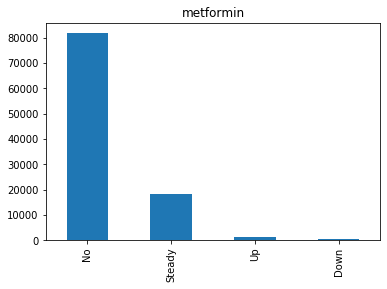

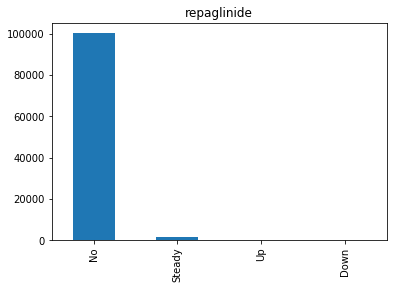

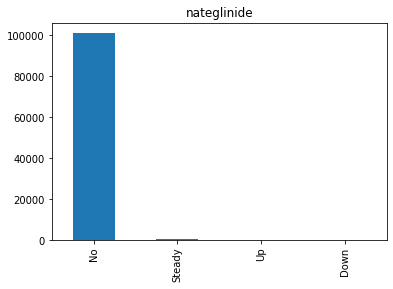

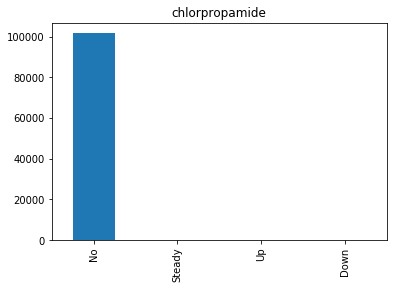

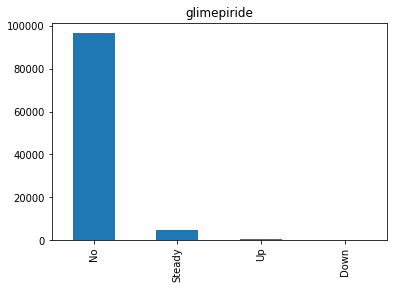

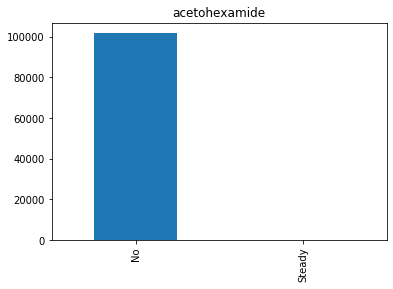

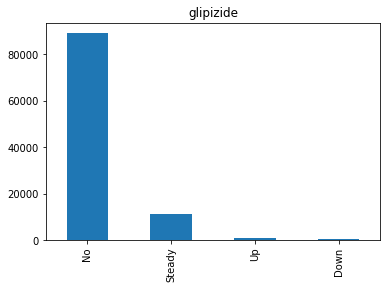

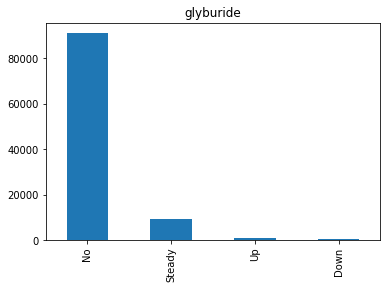

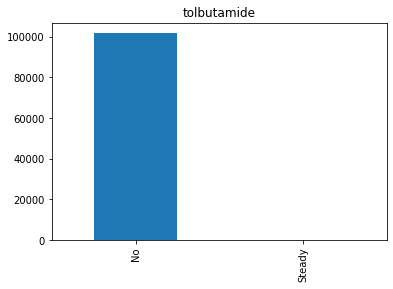

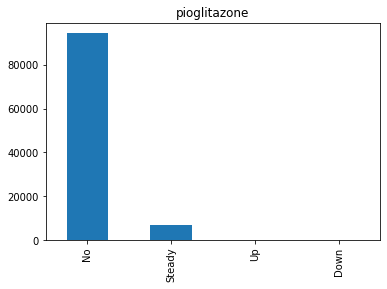

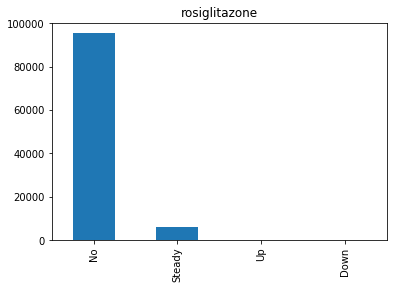

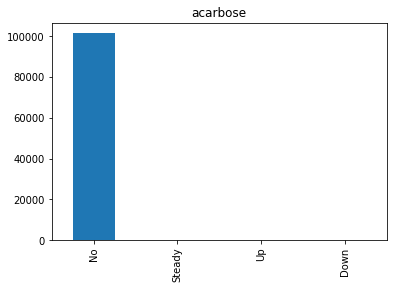

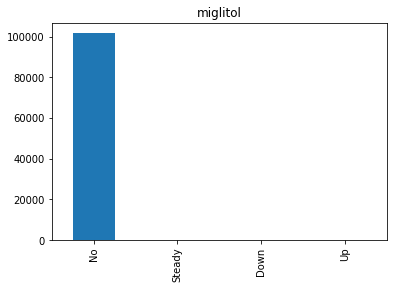

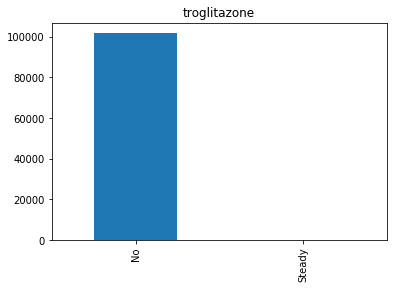

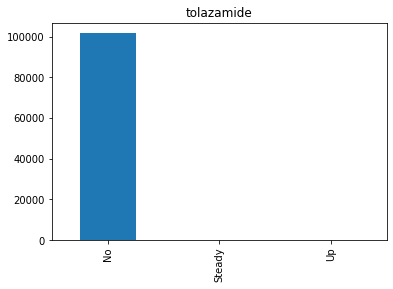

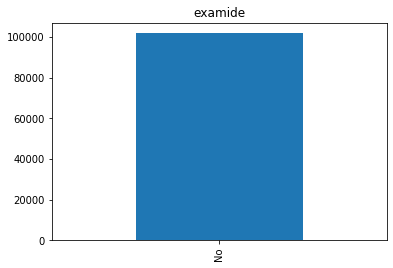

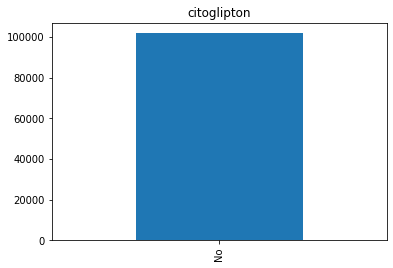

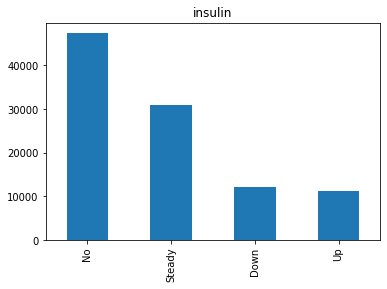

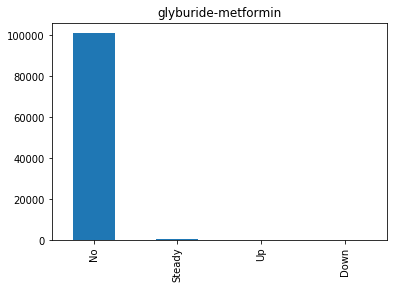

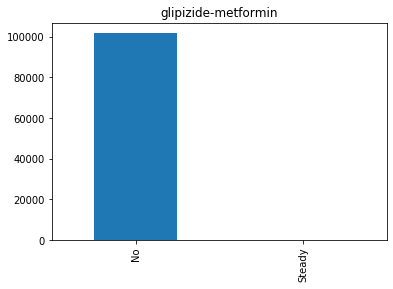

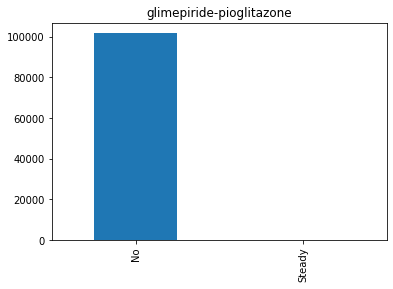

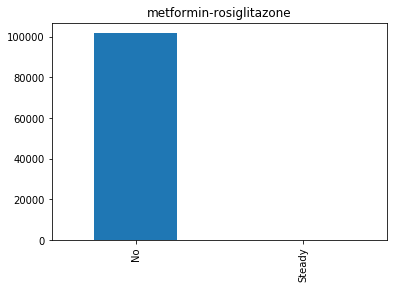

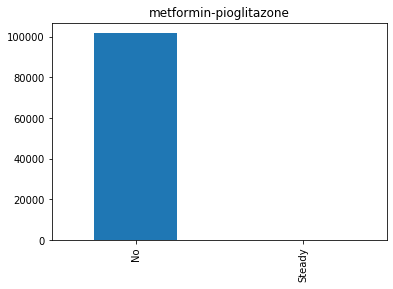

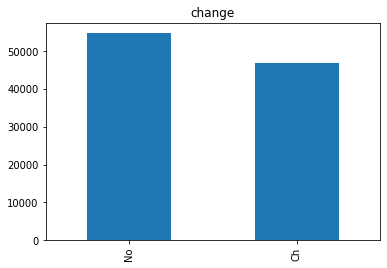

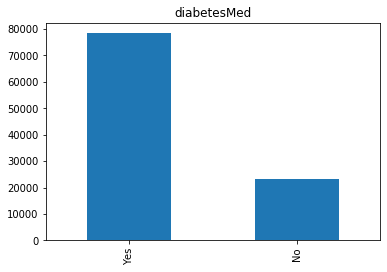

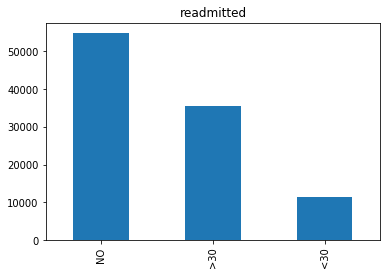

In [122]:
def visualize_cat_var(df, col):
    df = df.copy()
    df[col].value_counts().plot(kind = 'bar')
    plt.title(col)
    plt.show()
    
for i in categorical_col:
    visualize_cat_var(diab_data, i)

In [164]:
#Removing Values

#1. Numerical variable with unique value for each patient(e.g ids) will be removed
#2. Categorical variables with 1 value for all patients will be removed
#3. Variables with missing value over 50 % will be removed
#4. rows with missing values in any of its column will be removed. Imputation methods will be applied to this missing values in Phase 2 so that this rows can be included

#Dropping Variables based on the first 3 Criteria

#create list of variables to delete
col_to_drop = ['encounter_id','patient_nbr','examide', 'citoglipton', 'acetohexamide', 
               'weight', 'payer_code', 'medical_specialty','diag_2','diag_3']

diab_data = diab_data.drop(col_to_drop, axis = 1)

print(diab_data.shape)

(101766, 40)


In [129]:
print(diab_data.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [165]:
#Dropping rows with missing value (4th Criteria)

na_val_count_by_col = diab_data.isnull().sum()

print(na_val_count_by_col[na_val_count_by_col > 0])

print()

#Drop rows
diab_data = diab_data.dropna(axis = 0)

print(diab_data.shape)

race      2273
gender       3
diag_1      21
dtype: int64

(99473, 40)


In [155]:
#Feature Engineering

#Since the diag_1 has 717 unique values they will be grouped based on ICD 9 grouping standards

#function to group the ICD 9 codes into 19 groups based on ICD9 grouping standards
#This function will be optimized later

def convert_diagnosis(col):
    diag = []
    for i in col:
        if re.match("^\d*\.?\d+", i) is not None:
            if '.' not in i:
                x = int(i)
                if x > 0 and x < 140:
                    y = '1'
                    diag.append(y)
                elif x >=140 and x < 240:
                    y = '2'
                    diag.append(y)
                elif x >=240 and x < 280:
                    y = '3'
                    diag.append(y)
                elif x >=280 and x < 290:
                    y = '4'
                    diag.append(y)
                elif x >=290 and x < 320:
                    y = '5'
                    diag.append(y)
                elif x >=320 and x < 390:
                    y = '6'
                    diag.append(y)
                elif x >=390 and x < 460:
                    y = '7'
                    diag.append(y)
                elif x >=460 and x < 520:
                    y = '8'
                    diag.append(y)
                elif x >=520 and x < 580:
                    y = '9'
                    diag.append(y)
                elif x >=580 and x < 630:
                    y = '10'
                    diag.append(y)
                elif x >=630 and x < 680:
                    y = '11'
                    diag.append(y)
                elif x >=680 and x < 710:
                    y = '12'
                    diag.append(y)
                elif x >=710 and x < 740:
                    y = '13'
                    diag.append(y)
                elif x >=740 and x < 760:
                    y = '14'
                    diag.append(y)
                elif x >=760 and x < 780:
                    y = '15'
                    diag.append(y)
                elif x >=780 and x < 800:
                    y = '16'
                    diag.append(y)
                else:
                    y = '17'
                    diag.append(y)
            else:
                x = float(i)
                if x > 0 and x < 140:
                    y = '1'
                    diag.append(y)
                elif x >=140 and x < 240:
                    y = '2'
                    diag.append(y)
                elif x >=240 and x < 280:
                    y = '3'
                    diag.append(y)
                elif x >=280 and x < 290:
                    y = '4'
                    diag.append(y)
                elif x >=290 and x < 320:
                    y = '5'
                    diag.append(y)
                elif x >=320 and x < 390:
                    y = '6'
                    diag.append(y)
                elif x >=390 and x < 460:
                    y = '7'
                    diag.append(y)
                elif x >=460 and x < 520:
                    y = '8'
                    diag.append(y)
                elif x >=520 and x < 580:
                    y = '9'
                    diag.append(y)
                elif x >=580 and x < 630:
                    y = '10'
                    diag.append(y)
                elif x >=630 and x < 680:
                    y = '11'
                    diag.append(y)
                elif x >=680 and x < 710:
                    y = '12'
                    diag.append(y)
                elif x >=710 and x < 740:
                    y = '13'
                    diag.append(y)
                elif x >=740 and x < 760:
                    y = '14'
                    diag.append(y)
                elif x >=760 and x < 780:
                    y = '15'
                    diag.append(y)
                elif x >=780 and x < 800:
                    y = '16'
                    diag.append(y)
                else:
                    y = '17'
                    diag.append(y)
        elif 'V' in i:
            y = '18'
            diag.append(y)
        else:
            y = '19'
            diag.append(y)
            
    return diag

diab_data['diag_1'] = convert_diagnosis(diab_data['diag_1'])

In [167]:
#Tranform Target column

#Check the number of unique values in the target column

diab_data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [168]:
#The Target column has 3 categories we transform this two because we only want either readmitted or not

diab_data['readmitted'] = np.where(diab_data['readmitted'] == 'NO', '0', '1')

print(diab_data['readmitted'].unique())

['0' '1']


In [169]:
diab_data.to_csv('diab_data.csv')

In [131]:
#Tranform categorical variables using Label encoder

categorical_col = [col for col in diab_data.columns if diab_data[col].dtypes == 'O']

diab_data_cp = diab_data.copy()

label = LabelEncoder()

for col in categorical_col:
    diab_data_cp[col]=label.fit_transform(diab_data_cp[col])

In [133]:
diab_data_cp.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,0
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0


In [135]:
#Slit dataset into Features and Target variable
y = diab_data_cp['readmitted']

X = diab_data_cp.drop('readmitted', axis = 1)

In [137]:
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,0,6,25,1,1,41,0,1,...,0,0,1,1,0,0,0,0,1,0
1,2,0,1,1,1,7,3,59,0,18,...,0,0,3,1,0,0,0,0,0,1
2,0,0,2,1,1,7,2,11,5,13,...,0,0,1,1,0,0,0,0,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,0,3,1,0,0,0,0,0,1
4,2,1,4,1,1,7,1,51,0,8,...,0,0,2,1,0,0,0,0,0,1


In [138]:
#Feature Selection
#apply SelectKBest class feature selection method to extract top 10 best features
#This uses Chi square to score feature importance

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs         Score
12     number_inpatient  11728.320252
11     number_emergency   4583.198599
10    number_outpatient   2826.579194
7    num_lab_procedures   1343.448525
9       num_medications    883.319650
14     number_diagnoses    595.568079
6      time_in_hospital    525.292540
8        num_procedures    414.470395
5   admission_source_id    409.193829
13               diag_1    287.427786


In [139]:
top_variables = featureScores.nlargest(10, 'Score').Specs.tolist()

print(top_variables)

['number_inpatient', 'number_emergency', 'number_outpatient', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'time_in_hospital', 'num_procedures', 'admission_source_id', 'diag_1']


In [140]:
X = X[top_variables]

In [142]:
X.head()

,number_inpatient,number_emergency,number_outpatient,num_lab_procedures,num_medications,number_diagnoses,time_in_hospital,num_procedures,admission_source_id,diag_1
0,0,0,0,41,1,1,1,0,1,11
1,0,0,0,59,18,9,3,0,7,11
2,1,0,2,11,13,6,2,5,7,2
3,0,0,0,44,16,7,2,1,7,0
4,0,0,0,51,8,5,1,0,7,10


In [143]:
Rf = RandomForestClassifier()
Dt = DecisionTreeClassifier()
NB = GaussianNB()
Lg = LogisticRegression()

mod = [Rf, Dt, NB, Lg]

def classification_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    for i in model:
        clf = i.fit(X_train, y_train)
        pred = i.predict(X_test)
        print(i)
        print(accuracy_score(y_test, pred))
        Classes =['NO', 'YES']
        print(classification_report(y_test, pred, target_names=Classes))
        
        
classification_model(mod, X, y)
        

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.578345955364922
              precision    recall  f1-score   support

          NO       0.59      0.69      0.64     16034
         YES       0.56      0.44      0.49     13808

    accuracy                           0.58     29842
   macro avg       0.57      0.57      0.57     29842
weighted avg       0.57      0.58      0.57     29842

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.6176194625025132
              precision    recall  f1-score   support

          NO       0.61      0.81      0.70     16034
         YES       0.64      0.39      0.49     13808

    accuracy                           0.62     29842
   macro avg       0.63      0.60      0.59     29842
weighted avg       0.62      0.62      0.60     29842

